In [1]:
import numpy as np
import matplotlib.pyplot as plt

import rebound

Using the JPL HORIZONS System https://ssd.jpl.nasa.gov/?horizons

Searching NASA Horizons for 'Sun'... Found: Target body name: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Target body name: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Target body name: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Target body name: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Target body name: Mars Barycenter (4).


<Figure size 432x288 with 0 Axes>

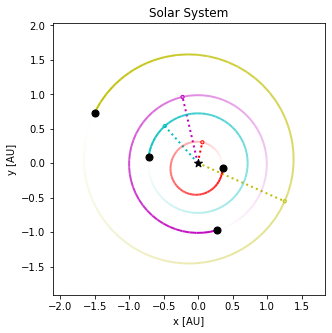

In [5]:
sim = rebound.Simulation()
sim.add('Sun')
sim.add('Mercury')
sim.add('Venus')
sim.add('Earth')
sim.add('Mars')

In [ ]:
plt.figure()
fig = rebound.OrbitPlot(sim, unitlabel='[AU]', periastron=True, color=True, lw=2)
plt.title('Solar System')
plt.show()